In [15]:
from openai import OpenAI
import os
import base64
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


In [8]:
%matplotlib inline


In [9]:
client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)


In [10]:
# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


In [11]:
def get_response(image_path, question):
    system_message = {
        "role": "system",
        "content": "You are a visual question answering assistant. You will be given an image and a question. You must answer the question based on the content of the image. Give the answer in no more than 5 words.",
    }

    base64_image = encode_image(image_path)

    user_message = {
        "role": "user",
        "content": [
            {"type": "text", "text": question},
            {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
            },
        ],
    }

    response = client.chat.completions.create(
        messages=[system_message, user_message],
        model="gpt-4o-mini",
        max_tokens=5,
    )

    text = response.choices[0].message.content
    return text


In [18]:
def vqa():
    image_path = input("Provide image path:")

    pil_im = Image.open(image_path, 'r')
    plt.imshow(np.asarray(pil_im))
    plt.show()

    question = input("Provide your question:")

    print(f"Question: {question}")

    answer = get_response(image_path, question)

    print(f"Answer: {answer}")


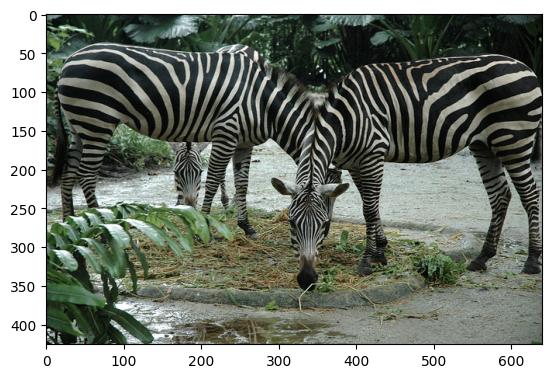

Question: How many zebras are in the picture?
Answer: Three zebras.


In [19]:
vqa()
